In [ ]:
""" 
Detailed analyses of line2 e4xperiments 
over last few days.
- Addressing a verity of questions related to genraelzation.
FOCUS ON PSYCHOMETRIC FUNCTIONS

"""

In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

/data1/code/python/drawmonkey


In [2]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [3]:
animal = "Pancho"
expt = "lines2"
date = 200907
session = 2

fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                          resave_overwrite=False)




found one matching filename: ['/data2/animals/Pancho/200907/200907_152527_lines2_Pancho_2.h5']
found one matching filename: ['/data2/animals/Pancho/200907/200907_152527_lines2_Pancho_2.pkl']
-- loaded presaved data: /data2/animals/Pancho/200907/200907_152527_lines2_Pancho_2.pkl


In [4]:
SAVEDIR = f"{fd['params']['figuredir_notebook']}/analysis_line2_090720/{animal}_{date}_{session}"
import os
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
## ==== PLOT PSYCHOMETRIC PROBES



In [ ]:
# ==== categorize each trial based on its probe type and task id

trials = getIndsTrials(fd)
dat = []
for t in trials:
    if getTrialsFixationSuccess(fd, t):
        probe = getTrialsTaskProbeInfo(fd, t)

        dat.append({
            "filedata":fd,
            "trial":t,
            "unique_task_name":getTrialsUniqueTasknameGood(fd, t),
            "tasknum":probe["tasknum"],
            "task_category":getTrialsTask(fd, t)["stage"],
            "block":getTrialsBlock(fd, t)
        })
from pythonlib.tools.dicttools import printOverviewKeyValues
printOverviewKeyValues(dat);

In [ ]:
CAT1 = None
CAT2 = ["tasknum", []]
plotargs = {"zoom":True, "plotver":"strokes", "markersize":4, "alpha":0.25}

fig = plotTrial2dGrid(datthis, cat1 = CAT1, cat2 = CAT2, ver="beh", plotargs=plotargs);
fig.savefig(f"{SAVEDIR}/psychometric_trials_beh_{settoget}.pdf")
fig = plotTrial2dGrid(datthis, cat1 = CAT1, cat2 = CAT2, ver="task", plotargs=plotargs);
fig.savefig(f"{SAVEDIR}/psychometric_trials_task_{settoget}.pdf")

In [ ]:
# ==== PICK OUT A PARTICULAR PSYCHOMETRIC SET
# THEN PLOT
import copy
for settoget in ["3line_psych1", "3line_psych2", "3line_psych3", 
                 "3line_psych5", "3line_psych6", "3line_psych7"]:
# for settoget in ["3line_psych7"]:
    
    datthis = copy.deepcopy([d for d in dat if d["task_category"]==settoget])
    if len(datthis)==0:
        continue
        
    datthis = sorted(datthis, key=lambda x:x["tasknum"])
    
    # ==== PRINTING INFORMATION
    if True:
        for d in datthis:
            print([d["task_category"], d["tasknum"], d["trial"], d["unique_task_name"]])
        printOverviewKeyValues(datthis);

    ## == reorganize tasknums into rows and cols that allow better visualization of psychometric dimensions
    # probably easiest to handcode
    if settoget=="3line_psych2":
        rowcolmappings = {
            1:{"row":0, "col":0},
            2:{"row":0, "col":1},
            3:{"row":0, "col":2},
            4:{"row":0, "col":3},
            5:{"row":0, "col":4},
            6:{"row":1, "col":0},
            7:{"row":1, "col":1},
            8:{"row":1, "col":2},
            9:{"row":1, "col":3},
            10:{"row":1, "col":4},
            11:{"row":2, "col":0},
            12:{"row":2, "col":1},
            13:{"row":2, "col":2},
            14:{"row":2, "col":3},
            15:{"row":2, "col":4},
            16:{"row":3, "col":2},
            17:{"row":3, "col":0},
            18:{"row":3, "col":1},
            19:{"row":3, "col":3},
            20:{"row":3, "col":4},
        }
    elif settoget=="3line_psych1":
        rowcolmappings = {
            1:{"row":0, "col":0},
            2:{"row":0, "col":1},
            3:{"row":0, "col":2},
            4:{"row":0, "col":3},
            5:{"row":0, "col":4},
            6:{"row":1, "col":0},
            7:{"row":1, "col":1},
            8:{"row":1, "col":2},
            9:{"row":1, "col":3},
            10:{"row":1, "col":4},
            11:{"row":2, "col":0},
            12:{"row":2, "col":1},
            13:{"row":2, "col":2},
            14:{"row":2, "col":3},
            15:{"row":2, "col":4},
        }
    elif settoget=="3line_psych6":
            rowcolmappings = {
            1:{"row":0, "col":0},
            2:{"row":0, "col":1},
            3:{"row":0, "col":2},
            4:{"row":1, "col":0},
            5:{"row":1, "col":1},
            6:{"row":1, "col":2},
            7:{"row":2, "col":0},
            8:{"row":2, "col":1},
            9:{"row":2, "col":2},
            10:{"row":3, "col":0},
            11:{"row":3, "col":2},
        }
    elif settoget=="3line_psych7":
            rowcolmappings = {
            1:{"row":0, "col":0},
            2:{"row":0, "col":1},
            3:{"row":0, "col":2},
            4:{"row":0, "col":3},
            5:{"row":0, "col":4},
            6:{"row":1, "col":1},
            7:{"row":1, "col":2},
            8:{"row":1, "col":3},
            9:{"row":1, "col":4},
            10:{"row":2, "col":1},
            11:{"row":2, "col":2},
            12:{"row":2, "col":3},
            13:{"row":2, "col":4},
        }        
    else:
        rowcolmappings = {i+1:{"row":0, "col":i} for i in range(len(set([d["tasknum"] for d in datthis])))}
    # else:
    #     print(settoget)
    #     assert False, "have not coded for this set"

    for d in datthis:
        d["row"]=rowcolmappings[d["tasknum"]]["row"]
        d["col"]=rowcolmappings[d["tasknum"]]["col"]

    CAT1 = ["row", []]
    CAT2 = ["col", []]
    plotargs = {"zoom":True, "plotver":"order", "markersize":4, "alpha":0.2}

    fig = plotTrial2dGrid(datthis, cat1 = CAT1, cat2 = CAT2, ver="beh", plotargs=plotargs);
    fig.savefig(f"{SAVEDIR}/psychometric_trials_beh_{settoget}.pdf")
    fig = plotTrial2dGrid(datthis, cat1 = CAT1, cat2 = CAT2, ver="task", plotargs=plotargs);
    fig.savefig(f"{SAVEDIR}/psychometric_trials_task_{settoget}.pdf")

In [ ]:
printOverviewKeyValues(datthis)

In [ ]:
for d in datthis:
    print(d.keys())

In [ ]:
## Quick plot of task categories
import pandas as pd
import seaborn as sns

D = pd.DataFrame(dat)
fig = plt.figure(figsize=(10,35))
sns.scatterplot(x="trial", y="unique_task_name", hue="task_category", data=D)
fig = plt.figure(figsize=(10,35))
sns.scatterplot(x="block", y="unique_task_name", hue="task_category", data=D)

In [ ]:

# OLD PLOTTING 
        DAT, angle_list, category_list, set_list, gdConfigs = \
        getGuideDotSets(fd, trials_list_all, set_variable = set_variable, indcenter = indcenter, 
                       nstrokes=NSTROKES)

        figs = plotTrialsSortedByCategory(DAT, fd, angle_list, set_list, REPLAYNUM = 1, rand_subset = None)
        for i, f in enumerate(figs):
            f.savefig(f"{SAVEDIR}/trialsBehSortedByCategory{i}_nstrokes{NSTROKES}.pdf")

    #     ## Overlay all trials, one plot for each task
    #     Key comparison is the same guide dots, but different task.
    #     Plot, mean across trials, separated by angle and category (imagine a grid).

        for replaynum in [None, 1]:
            for g in gdConfigs:

                anglelist = g["angle"]
                catlist = g["category"]

                for ver in ["beh", "task"]:
                    fig = plotAngleByCatOverlayTrials_(DAT, fd, anglelist, catlist, ver=ver, replaynum=replaynum)
                    fig.savefig(f"{SAVEDIR}/AngleByCatOverlayTrials_{ver}_gconfig{g['id']}_replay{replaynum}_nstrokes{NSTROKES}.pdf")    



## [development] taking stroke average

In [21]:
set([getTrialsUniqueTasknameGood(fd,t) for t in getIndsTrials(fd)])

got 983 total trials


{'3line_1-10-27333823',
 '3line_1-11-69344122',
 '3line_1-17-55557749',
 '3line_1-22-47583747',
 '3line_1-23-69352161',
 '3line_1-24-37494164',
 '3line_1-5-27278242',
 '3line_1-8-22195561',
 '3line_1-9-67354449',
 '3line_10-10-53524950',
 '3line_10-11-56692258',
 '3line_10-17-69674936',
 '3line_10-22-57542369',
 '3line_10-23-67454358',
 '3line_10-24-41303851',
 '3line_10-25-70362920',
 '3line_10-8-51393063',
 '3line_10-9-62406244',
 '3line_2-10-32324455',
 '3line_2-11-62373749',
 '3line_2-22-20216123',
 '3line_2-23-51335756',
 '3line_2-24-22626381',
 '3line_2-8-27181750',
 '3line_2-9-49305160',
 '3line_3-10-62273940',
 '3line_3-11-36276978',
 '3line_3-17-68203622',
 '3line_3-18-34553858',
 '3line_3-22-33544951',
 '3line_3-23-62565922',
 '3line_3-24-27207850',
 '3line_3-25-39524341',
 '3line_3-3-22276418',
 '3line_3-8-19272178',
 '3line_3-9-62384357',
 '3line_4-1-55692142',
 '3line_4-10-52524138',
 '3line_4-11-35346078',
 '3line_4-17-27536059',
 '3line_4-22-51382950',
 '3line_4-23-51214

got 983 total trials


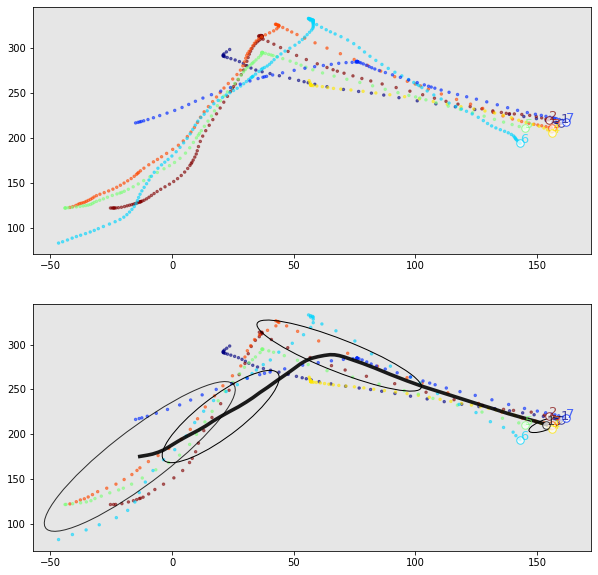

In [35]:
## ===== given a list of strokes, take the average of those strokes
# method: align all strokes by interpolation.
if False:
    # multi-session version.
    strokeslist = [getTrialsStrokesByPeanuts(P["filedata"], P["trial"]) for P in PROBEDAT[:5]]
else:
#     strokeslist = [getTrialsStrokesByPeanuts(fd, t) for t in getIndsTrials(fd) if getTrialsFixationSuccess(fd,t)][:20]
    strokeslist = [getTrialsStrokesByPeanuts(fd, t) for t in getIndsTrials(fd) \
                   if getTrialsFixationSuccess(fd,t) and getTrialsUniqueTasknameGood(fd,t)=="3line_psych5_9-protype"]

# take average for x and y independently.
strokenum = 0

# pick out that desired stroke num
slist = [s[strokenum] for s in strokeslist if len(s)>strokenum]

# interpolate each strokes (using actual time)
from pythonlib.tools.stroketools import strokesInterpolate
Npts = 50
slist_interp = strokesInterpolate(slist, Npts, uniform=False)


# sanity check, plot
plt.figure(figsize=(10,10))
from pythonlib.drawmodel.strokePlots import plotDatStrokes

ax = plt.subplot(211)
plotDatStrokes(slist, ax=ax, plotver="order", each_stroke_separate=False)


ax = plt.subplot(212)
plotDatStrokes(slist_interp, ax=ax, plotver="order", each_stroke_separate=False)


# stack the arrays and then take average
slist_interp_stack = np.stack(slist_interp)
slist_interp_stack.shape
strok_mean = np.mean(slist_interp_stack, axis=0)

# get std and sem
strok_std = np.std(slist_interp_stack, axis=0)



plotDatStrokes([strok_mean], ax=ax, plotver=[0,0,0], each_stroke_separate=True)

x = slist_interp_stack[:,0,0]
y = slist_interp_stack[:,0,1]
std = 1.0/np.sqrt(50-1)
std = 1
confidence_ellipse(x,y, ax=ax, n_std=std, edgecolor="k")

x = slist_interp_stack[:,17, 0]
y = slist_interp_stack[:,17,1]
std = 1.0/np.sqrt(50-1)
std = 1
confidence_ellipse(x,y, ax=ax, n_std=std, edgecolor="k")


x = slist_interp_stack[:,35,0]
y = slist_interp_stack[:,35,1]
std = 1.0/np.sqrt(50-1)
std = 1
confidence_ellipse(x,y, ax=ax, n_std=std, edgecolor="k")

x = slist_interp_stack[:,-1,0]
y = slist_interp_stack[:,-1,1]
std = 1.0/np.sqrt(50-1)
std = 1
confidence_ellipse(x,y, ax=ax, n_std=std, edgecolor="k", alpha=0.8)

In [70]:
from astropy.stats import bootstrap

bootstrap


<function astropy.stats.funcs.bootstrap(data, bootnum=100, samples=None, bootfunc=None)>

got 983 total trials


/data1/code/python/pythonlib/pythonlib/drawmodel/strokePlots.py:193: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  else:


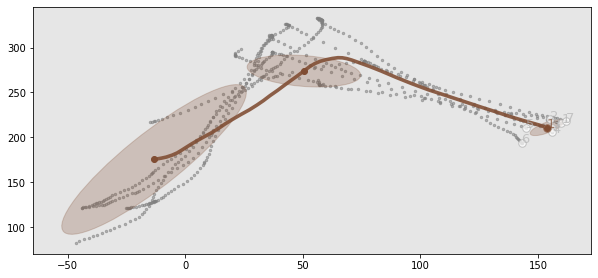

In [67]:
from pythonlib.drawmodel.strokePlots import plotDatStrokesMean

# = TEST
if False:
    # multi-session version.
    strokeslist = [getTrialsStrokesByPeanuts(P["filedata"], P["trial"]) for P in PROBEDAT[:5]]
else:
#     strokeslist = [getTrialsStrokesByPeanuts(fd, t) for t in getIndsTrials(fd) if getTrialsFixationSuccess(fd,t)][:20]
    strokeslist = [getTrialsStrokesByPeanuts(fd, t) for t in getIndsTrials(fd) \
                   if getTrialsFixationSuccess(fd,t) and getTrialsUniqueTasknameGood(fd,t)=="3line_psych5_9-protype"]

# take average for x and y independently.
strokenum = 0

# pick out that desired stroke num
slist = [s[strokenum] for s in strokeslist if len(s)>strokenum]

# sanity check, plot
plt.figure(figsize=(10,10))

ax = plt.subplot(211)
plotDatStrokes(slist, ax=ax, plotver=[0.5,0.5,0.5], each_stroke_separate=False)

plotDatStrokesMean(strokeslist, ax=ax, strokenum=strokenum, color=np.array([0.5, 0.3, 0.2]))


## scoring behavior based on different models


# NOTES:
Softmax is hacky right now.

In [ ]:
def _run(prior_ver, likeli_ver="split_segments", posterior_ver="weighted", title=""):
    dset = makeDataset(filedata, trials_list)
    priorFunction, NORM_VER = makePriorFunction(ver=prior_ver)
    likeliFunction = makeLikeliFunction(ver=likeli_ver)
    mod = Model(modelname, priorFunction, likeliFunction)
    dset.applyModel(mod, prior_ver= NORM_VER, posterior_ver=posterior_ver)
    dset.plotPosteriorHist()
    plt.title(title)
    return dset

# 1) random model
_run("uniform", "split_segments", "weighted", "uniform")

# 2) positive control model [max likelis]
_run("uniform", "split_segments", "maxlikeli", "maxlikeli")


# 3) positive control model [weigh likelis by softmax(likelis)
_run("uniform", "split_segments", "likeli_weighted", "likeli_weighted")


# 4) Hypothesis: distance finger travel
dset = _run("distance_travel", title="distance_travel")

# 5) Hypothesis, angle bias
dset = _run("angle_test", title="angle_test")

dset.plotExampleTrial(3)

# 5) Hypothesis, angle bias
dset = _run("angle_test", title="angle_test")

NameError: name 'title' is not defined

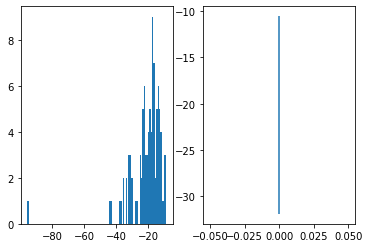

In [86]:
from pythonlib.drawmodel.analysis import *

trials = range(1,100)

strokes = [getTrialsStrokesByPeanuts(fd, t) for t in trials if getTrialsFixationSuccess(fd,t)]

tasks = [getTrialsTask(fd, t) for t in trials if getTrialsFixationSuccess(fd,t)]
fix = [getTrialsFix(fd, t)["fixpos_pixels"] for t in trials if getTrialsFixationSuccess(fd,t)]
strokes_task = [getTrialsTaskAsStrokes(fd, t) for t in trials if getTrialsFixationSuccess(fd,t)]
for s, t, f in zip(strokes_task, tasks, fix):
    t["strokes"] = s
    t["fixpos"] = f
    
dset = Dataset(strokes, tasks)

# === APPLY MODEL
PRIORVER = "uniform" # CAHNGE THIS
LIKELIVER = "segments"
MODELNAME = "test"
priorFunction, NORM_VER = makePriorFunction(ver=PRIORVER)
likeliFunction = makeLikeliFunction(ver=LIKELIVER)
mod = Model(MODELNAME, priorFunction, likeliFunction)

# === apply model to score all beahvuior
POSTERIOR_VER = "maxlikeli"
dset.applyModel(mod, prior_ver= NORM_VER, posterior_ver=POSTERIOR_VER)
dset.plotPosteriorHist()
plt.title(title)


In [92]:
# == make prior function that allows only things chunkable.
# so is uniform, based on chunks


NameError: name 'task' is not defined

In [90]:
dset.model.parses_both_direction

True

NOTE: the x and y lims are hacky, should change


KeyError: 'model_parses'

## BELOW - OLD SCRATCH

In [ ]:
# === LOAD ALL SESSIONS FOR A DAY
# A = [("lines1", "Red", 200831),
#  ("lines1", "Pancho", 200831),
#  ("ESC1", "Red", 200830),
#  ("ESC1", "Pancho", 200830)]
A = [("lines2", "Red", 200907),
 ("lines2", "Pancho", 200907)]

for (expt, animal, date) in A:

    # expt = "lines1"
    # animal = "Red"
    # date = 200831

    # expt = "ESC1"
    # animal = "Red"
    # date = 200830

    # simple, just try many sessions...
    fdsessions = []
    FD = {}
    N = 12
    for session in range(10):
        fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                          resave_overwrite=False)
        if fd is not None:
            print(f"appending fd for sess {session}")
            fdsessions.append({
                "session": session,
                "fd":fd})
            FD[session] = fd
            if session==N-1:
                assert False, "got the end and still found.. you need to search for even more sessions..."

            SAVEDIR = f"{fd['params']['figuredir_notebook']}/probes/{animal}_{date}"
            import os
            os.makedirs(SAVEDIR, exist_ok=True)


    print("--- SUMMARY")
    for f in fdsessions:
        print(f"session: {f['session']}, ntrials: {f['fd']['params']['n_trials']}")


    # === categorize all trials based on task/probe, etc
    probedat = []
    ct = 0
    for sess, fd in FD.items():
        for t in getIndsTrials(fd):
            if getTrialsFixationSuccess(fd, t):
                probe = getTrialsTaskProbeInfo(fd, t)
                task = getTrialsTask(fd, t)
                
#                 print(probe)
                
                if probe["prototype"]==0 and len(probe["saved_setnum"])==0 and probe["resynthesized"]==0:
                    # then this is new random task sampled each block.
                    randomtask = True
                else:
                    randomtask = False

                if probe["probe"]==0:
                    kind = "train"
                else:
                    if probe["feedback_ver"]=="same_as_task" and randomtask==False:
                        if probe["constraints_to_skip"]=={}:
                            kind = "probe1_liketrain"
                        elif "strokes" in probe["constraints_to_skip"].values():
                            kind = "probe1_nostrokeconstraint"
                    elif probe["feedback_ver"]=="same_as_task" and randomtask==True and probe["constraints_to_skip"]=={}:
                        kind = "probe2_liketrain"
                    elif probe["feedback_ver"]=="same_as_task" and randomtask==True and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe2_nostrokeconstraint"
                    elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and randomtask==False and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe3"
                    elif probe["feedback_ver"] in ["same_except_model"] and randomtask==False and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe3_hdpos"
                    elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and randomtask==True and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe4"
                    else:
                        print(probe)
                        assert False, "what kind is this?"

                probedat.append({
                    "session":sess,
                    "trial":t,
                    "trial_day":ct,
                    "kind":kind,
                    "taskname": probe["unique_name"],
                    "stage":task["stage"],
                    "block":getTrialsBlock(FD[sess], t),
                    "prototype":probe["prototype"],
                    "constraints_to_skip":probe["constraints_to_skip"]})
                ct+=1


    # == for each category, list names of all tasks
    kindlist = set([p["kind"] for p in probedat])
    print("probe kinds -- trials");
    for kind in kindlist:
        print(" ")
        print(kind)
        trials = [p["trial"] for p in probedat if p["kind"]==kind]
        tasknames = [p["taskname"] for p in probedat if p["kind"]==kind]
    #     print(trials)
        print(set(tasknames))
        plt.figure()
        plt.plot(trials, tasknames)

    import seaborn as sns
    import pandas as pd
    dframe = pd.DataFrame(probedat)

    # sns.scatterplot(x="trial", y="taskname", data=dframe, hue="kind")
    fig, axes = plt.subplots(5, 1, sharex=True, squeeze=False, figsize=(28, 10))

    sns.scatterplot(x="trial_day", y="kind", data=dframe, hue="kind", ax=axes[0][0])
    sns.scatterplot(x="trial_day", y="stage", data=dframe, hue="kind", ax=axes[1][0])
    sns.scatterplot(x="trial_day", y="stage", data=dframe, hue="prototype", ax=axes[2][0])
    sns.lineplot(x="trial_day", y="session", data=dframe, ax=axes[3][0])
    sns.lineplot(x="trial_day", y="block", data=dframe, ax=axes[4][0])

    fig.savefig(f"{SAVEDIR}/overviewAllTrials.pdf")



    stagelist = set([p["stage"] for p in probedat])
    sesslist = set([p["session"] for p in probedat])    
    kindlist = set([p["kind"] for p in probedat])

    ## PLOT PROBE TASKS OVER THE ENTIRE DAY
    maxtrialsplot = 80

    for kind in kindlist:
        for stage in stagelist:
            for s in sesslist:
                trialsthis = [p["trial"] for p in probedat if p["session"]==s and p["kind"]==kind and p["stage"]==stage]
                fd = FD[s]
                print(f"-- for session {s}, kind {kind}, stage {stage}; trials:")
                print(trialsthis)

                if len(trialsthis)>0:
                    if len(trialsthis)>maxtrialsplot:
                        trialsthis = sorted(random.sample(trialsthis, maxtrialsplot))                        
                        r = None
                    else:
                        r = None
                    titles = []
                    for t in trialsthis:
                        mscore = getTrialsBehEvaluation(fd, t)["output"]["modelscore"]["value"][0][0]
                        bscore = getTrialsBehEvaluation(fd, t)["beh_multiplier"][0][0]                                               
                        titles.append(f"{t},bk{getTrialsBlock(fd, t)},{getTrialsTask(fd, t)['str']}\nmsco{mscore:.2f},bsco{bscore:.2f}")

#                         titles = [f"{t},bk{getTrialsBlock(fd, t)}{getTrialsTask(fd, t)['str']}\nmscore{mscore}" for t in trialsthis]
                    # plot
                    
                    # construct titles
                    
                    fig1 = plotMultTrialsSimple(fd, trialsthis, zoom=True, strokes_ver="peanuts", plot_fix=True,
                                            plotver="strokes", rand_subset = r, titles=titles)

                    scores = [getTrialsScoreRecomputed(fd, t, normalize=True) for t in trialsthis]
                    scores_compos = [getTrialsScoreRecomputed(fd, t, ver="DTW_min", normalize=True) for t in trialsthis]
                    scores_compos2 = [getTrialsScoreRecomputed(fd, t, ver="DTW_min_minus_max", normalize=True) for t in trialsthis]

                    # == plot quick scores
                    fig2 = plt.figure(figsize=(10, 12))

                    plt.subplot(311)
                    plt.title(f"session {s}, kind {kind}, stage {stage}")
                    plt.plot(trialsthis, scores, "ok", label="pts")
    #                 plt.plot(trialsthis, scores_compos, "or", label="compositonal")
    #                 plt.plot(trialsthis, scores_compos2, "og", label="compositonal_min_minus_max")
                    plt.ylabel("score (pts) (norm HD, high is good)")
                    plt.ylim([-0.2, 1])
                    plt.legend()

                    plt.subplot(312)
                    plt.title(f"session {s}, kind {kind}, stage {stage}")
    #                 plt.plot(trialsthis, scores, "ok", label="pts")
                    plt.plot(trialsthis, scores_compos, "or", label="compositonal")
    #                 plt.plot(trialsthis, scores_compos2, "og", label="compositonal_min_minus_max")
                    plt.ylabel("score (compositonal) (norm HD, high is good)")
                    plt.ylim([-0.5, 1])
                    plt.legend()

                    plt.subplot(313)
                    plt.title(f"session {s}, kind {kind}, stage {stage}")
    #                 plt.plot(trialsthis, scores, "ok", label="pts")
    #                 plt.plot(trialsthis, scores_compos, "or", label="compositonal")
                    plt.plot(trialsthis, scores_compos2, "og", label="compositonal_min_minus_max")
                    plt.ylabel("score (compositonal_min_minus_max) (norm HD, high is good)")
                    #     plt.ylim([-0.2, 1])
                    plt.legend()

    #                 plt.subplot(212)
    #                 s1 = (scores - np.mean(scores))/np.std(scores)
    #                 s2 = (scores_compos - np.mean(scores_compos))/np.std(scores_compos)
    #                 s3 = (scores_compos2 - np.mean(scores_compos2))/np.std(scores_compos2)
    #                 plt.plot(trialsthis, s1, "ok", label="pts")
    #                 plt.plot(trialsthis, s2, "or", label="compositonal")
    #                 plt.plot(trialsthis, s3, "og", label="compositonal_min_minus_max")
    #                 plt.title("z-scored")
    #                 plt.ylabel("score (recomputed) (norm HD, high is good)")
    #                 plt.ylim([-3, 3])
    #                 plt.legend()

                    # save
                    fig1.savefig(f"{SAVEDIR}/trialsByProbeKind_{kind}-{stage}-sess{s}-fig1.pdf")
                    fig2.savefig(f"{SAVEDIR}/trialsByProbeKind_{kind}-{stage}-sess{s}-fig2.pdf")
    #                 fig2.savefig(f"{SAVEDIR}/trialsByProbeKind_sess{s}-{kind}-{stage}-fig2.pdf")





In [ ]:
getTrialsTask(fd, t)["savedTaskSet"]

In [ ]:
expt = "lines2"
animal = "Pancho"
date = 200904

fdsessions = []
FD = {}
N = 12
for session in range(10):
    fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)
    if fd is not None:
        print(f"appending fd for sess {session}")
        fdsessions.append({
            "session": session,
            "fd":fd})
        FD[session] = fd
        if session==N-1:
            assert False, "got the end and still found.. you need to search for even more sessions..."

        SAVEDIR = f"{fd['params']['figuredir_notebook']}/probes/{animal}_{date}"
        import os
        os.makedirs(SAVEDIR, exist_ok=True)


print("--- SUMMARY")
for f in fdsessions:
    print(f"session: {f['session']}, ntrials: {f['fd']['params']['n_trials']}")


# === categorize all trials based on task/probe, etc
probedat = []
ct = 0
for sess, fd in FD.items():
    for t in getIndsTrials(fd):
        if getTrialsFixationSuccess(fd, t):
            probe = getTrialsTaskProbeInfo(fd, t)
            task = getTrialsTask(fd, t)

            if probe["probe"]==0:
                kind = "train"
            else:
                if probe["feedback_ver"]=="same_as_task" and probe["prototype"]==1:
                    if probe["constraints_to_skip"]=={}:
                        kind = "probe1_liketrain"
                    elif "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe1_nostrokeconstraint"
                elif probe["feedback_ver"]=="same_as_task" and probe["prototype"]==0 and probe["constraints_to_skip"]=={}:
                    kind = "probe2_liketrain"
                elif probe["feedback_ver"]=="same_as_task" and probe["prototype"]==0 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe2_nostrokeconstraint"
                elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and probe["prototype"]==1 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe3"
                elif probe["feedback_ver"] in ["same_except_model"] and probe["prototype"]==1 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe3_hdpos"
                elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and probe["prototype"]==0 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe4"
                else:
                    print(probe)
                    assert False, "what kind is this?"

            probedat.append({
                "session":sess,
                "trial":t,
                "trial_day":ct,
                "kind":kind,
                "taskname": probe["unique_name"],
                "stage":task["stage"],
                "prototype":probe["prototype"],
                "constraints_to_skip":probe["constraints_to_skip"]})
            ct+=1

In [ ]:

## for each trial also get online and offline score
for p in probedat:
    s = p["session"]
    t = p["trial"]
    
    p["bk"] = getTrialsBlock(FD[s], t)
    p["bq"] = getTrialsBloque(FD[s], t)
    
    # score
    if getTrialsFixationSuccess(FD[s], t):
        p["score_model"] = getTrialsOutcomesWrapper(FD[s], t)["beh_evaluation"]["output"]["modelscore"]["value"][0][0]
        p["score_hd"] = getTrialsOutcomesWrapper(FD[s], t)["beh_evaluation"]["output"]["hausdorff"]["value"][0][0]
        p["score_offline"] = getTrialsScoreRecomputed(FD[s], t)
    
    
    
    

import pandas as pd

dfthis = pd.DataFrame(probedat)
dfthis

In [ ]:
### import seaborn as sns

y = "score_model"
sns.relplot(x = "trial", y=y, hue="bk", data=dfthis, row="kind", kind="scatter", aspect=3)
sns.relplot(x = "trial_day", y=y, hue="bk", data=dfthis, row="kind", kind="scatter", aspect=3)
sns.relplot(x = "bq", y=y, hue="bk", data=dfthis, row="kind", kind="scatter", aspect=3)

In [ ]:
### import seaborn as sns

y = "score_model"
sns.catplot(x = "bk", y=y, data=dfthis, row="kind", kind="point", aspect=3)
# sns.catplot(x = "bq", y=y, data=dfthis, col="kind", row="bk", kind="point", aspect=3)
sns.catplot(x = "bq", y=y, data=dfthis, row="kind", hue="bk", kind="point", aspect=3)

In [ ]:
## COMPUTE COMPOSITIONAL SCORE
# [Quick version] DTW score relative to non-DTW score

## ==== [testing] stroke based hd
from pythonlib.tools.stroketools import distanceDTW
t = random.sample(getIndsTrials(fd),1)[0]

strokes_beh = getTrialsStrokesByPeanuts(fd, t, replaynum=1)
strokes_task = getTrialsTaskAsStrokes(fd, t)

for ass in [True, False]:
    print(f"assymetric: {ass}")
    plotTrialSimple(fd, t, zoom=True, plot_fix=False, plotver="strokes", 
                    use_peanut_params={'replaynum': 1, 'active': True})

    print(distanceDTW(strokes_beh, strokes_task[::-1], ver="segments", asymmetric=ass))
    print(distanceDTW(strokes_beh, strokes_task, ver="segments", asymmetric=ass))

    plt.figure(figsize=(10,10))
    ax = plt.subplot(211)
    plotDatStrokes(strokes_beh, ax=ax)
    plotDatStrokes(strokes_task[::-1], ax=ax)

    ax = plt.subplot(212)
    plotDatStrokes(strokes_beh, ax=ax)
    plotDatStrokes(strokes_task, ax=ax)

# compute minimum score for all permutations of task strokes
# make assymetric false, so forced to use all task strokes.
print("-- all permutations")
from itertools import permutations
scores =[]
for s in permutations(strokes_task):
    print(distanceDTW(strokes_beh, s, ver="segments", asymmetric=False))
    scores.append(distanceDTW(strokes_beh, s, ver="segments", asymmetric=False)[0])
score = min(scores)
print(score)

In [ ]:
from pythonlib.tools.listtools import permuteRand

permuteRand([1,2,3], 6, not_enough_ok=True)
from itertools import permutations

for i in permutations([1,2,3]):
    print(i)


## SCRATCH

In [ ]:
featurestoplot = []
for key, val in getTrialsBlockParams(fd, 1)["behEval"]["beh_eval"].items():
    if val["feature"] =="hausdorff" and val["weight"][0][0]>0:
        featurestoplot.append("hausdorff")
    if val["feature"] =="frac_touched" and val["weight"][0][0]>0:
        featurestoplot.append("frac_touched")
featurestoplot.append("score_offline")

fig1, fig2 = plotOverview_(df, featurestoplot=featurestoplot)
fig1.savefig(f"{SAVEDIRDAY}/overview1.pdf")
fig2.savefig(f"{SAVEDIRDAY}/overview2.pdf")

# 2) relationship between reward and factors that go into reward
figs = plotReward(df, featurestoplot=featurestoplot)
for i, f in enumerate(figs):
    f.savefig(f"{SAVEDIRDAY}/reward_score_{i}.pdf")

# 3) PLOT BEHAVIOR FOR TRIALS SORTED BY SCORE
import copy
scoretypes = copy.copy(featurestoplot)
scoretypes.extend(["behscore", "reward"])
for score_type in scoretypes:
    FIGS = plotBehSortedByScore(df, fd, score_type)
    for ver, figs in FIGS.items():
        for i, f in enumerate(figs):
            f.savefig(f"{SAVEDIRDAY}/trialsSortedByScore_{score_type}_{ver}_{i}_.pdf")

# 4) Plot behavior subsampling in chronological order
trials = [t for t in getIndsTrials(fd) if getTrialsFixationSuccess(fd, t)]
Nrand = 80
fig = plotMultTrialsSimple(fd, trials, zoom=True, strokes_ver="peanuts", plot_fix=False,
                        plotver="strokes", rand_subset=Nrand)
fig.savefig(f"{SAVEDIRDAY}/trialsRandomChronOrder.pdf")

# 5) TASK VISUALIZATIONS, SCHEDULE, REPETITION
figs = plotTaskSchedules(df)
for i, f in enumerate(figs):
    f.savefig(f"{SAVEDIRDAY}/taskSchedule{i}.pdf")

In [ ]:
if False:
    animal = "Pancho"
    expt = "pilot"
    date = 200822
    session = 1

    fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                              resave_overwrite=False)

    ## ==== [testing] stroke based hd
    from pythonlib.tools.stroketools import distanceDTW
    t = random.sample(getIndsTrials(fd),1)[0]

    for ass in [True, False]:
        print(f"assymetric: {ass}")
        plotTrialSimple(fd, t, zoom=True, plot_fix=False, plotver="strokes", 
                        use_peanut_params={'replaynum': 1, 'active': True})

        strokes_beh = getTrialsStrokesByPeanuts(fd, t, replaynum=1)
        strokes_task = getTrialsTaskAsStrokes(fd, t)
        print(distanceDTW(strokes_beh, strokes_task[::-1], ver="segments", asymmetric=ass))
        print(distanceDTW(strokes_beh, strokes_task, ver="segments", asymmetric=ass))

        plt.figure(figsize=(10,10))
        ax = plt.subplot(211)
        plotDatStrokes(strokes_beh, ax=ax)
        plotDatStrokes(strokes_task[::-1], ax=ax)

        ax = plt.subplot(212)
        plotDatStrokes(strokes_beh, ax=ax)
        plotDatStrokes(strokes_task, ax=ax)


In [ ]:
## ==== plot scoring separated by task type

df = extractSessionDf(fd)

# === add note about what probe type this is



## TO DO:
(1) get all permutations
(2) normalize by num strokes.
(3) systematic - compare to old version.